In [1]:
# Author: Damodar Rajbhandari (2019)

from IPython.display import clear_output, display

# Mounting Google Drive in Collab instance
from google.colab import drive
drive.mount('/content/drive')

clear_output(wait=True)

print("Damodar, Your Google Drive is mounted!!!")

# To goto Nepse MoreRefinedCompanyData folder
# !cd drive/My\ Drive/MoreRefinedCompanyData

Damodar, Your Google Drive is mounted!!!


In [ ]:
# Downloading mpl_finance to import candlestick_ohlc
!pip install mpl_finance
clear_output()

# Importing necessary dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [5]:
ask = input("Which company do you want to visualize?\n")
company = pd.read_csv("../content/drive/My Drive/MoreRefinedCompanyData/{}.csv".format(ask), index_col = "Dates")

Which company do you want to visualize?
AHPC


In [6]:
company.head()

,Traded Company,No. of Transaction,Maximum Price,Minimum Price,Closing Price,Traded Shares,Total Amount During Transaction,Previous Closing Price,Difference
Dates,,,,,,,,,
2010-04-19,Arun Valley Hydropower Development Co. Ltd.,4,425.0,417.0,417.0,310.0,129590.0,425.0,-8.0
2010-04-20,Arun Valley Hydropower Development Co. Ltd.,16,410.0,391.0,396.0,390.0,155760.0,417.0,-21.0
2010-04-21,Arun Valley Hydropower Development Co. Ltd.,24,403.0,374.0,380.0,620.0,238920.0,396.0,-16.0
2010-04-22,Arun Valley Hydropower Development Co. Ltd.,4,390.0,375.0,390.0,240.0,92410.0,380.0,10.0
2010-04-25,Arun Valley Hydropower Development Co. Ltd.,8,390.0,380.0,385.0,570.0,219100.0,390.0,-5.0


In [ ]:
# Fixing the Jupyter notebook figure size
plt.rcParams["figure.figsize"] = (15,8)

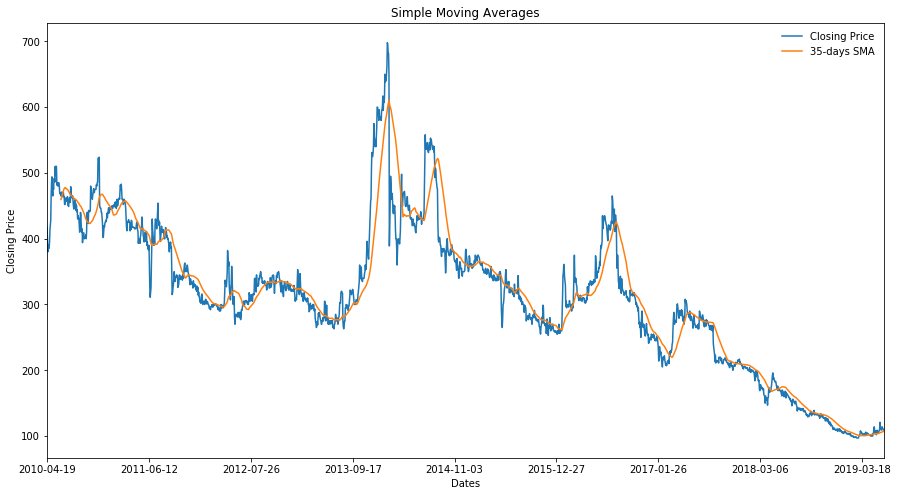

In [8]:
# Simple moving average on stock price.

a = company.loc[:, "Closing Price"]
a.plot(label="Closing Price")
#a.rolling(3).mean().plot(label = "3-days SMA")
a.rolling(35).mean().plot(label = "35-days SMA")
plt.ylabel("Closing Price")
plt.legend(loc='upper right', frameon=False)
plt.title('Simple Moving Averages')
plt.show()

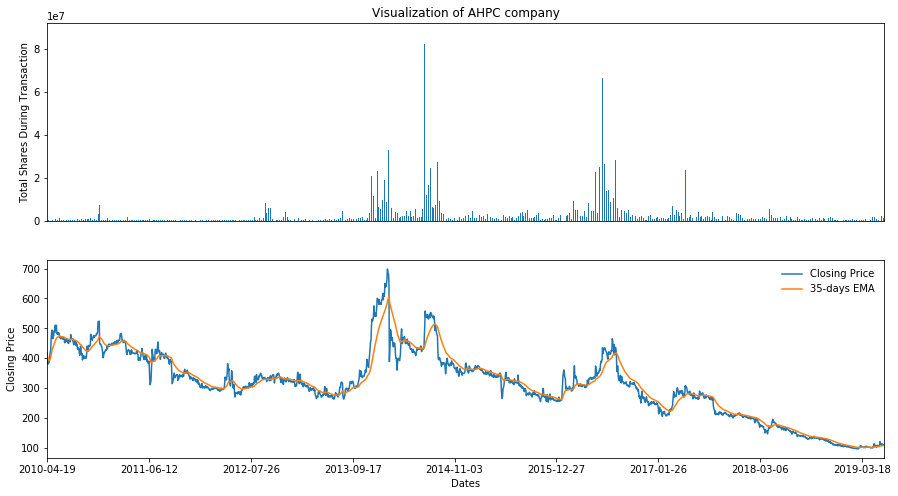

In [9]:
# Exponential moving average on stock price.

plt.subplot(2,1,1)
b = company.loc[:,"Total Amount During Transaction"]
ax = b.plot.bar()
ax.tick_params(labelbottom=False)  
ax.get_xaxis().set_ticks([])
plt.xlabel("")
plt.ylabel("Total Shares During Transaction")
plt.title("Visualization of {} company".format(ask))
# Total Shares During Transaction per day of this company 

plt.subplot(2,1,2)
a = company.loc[:, "Closing Price"]
a.plot(label="Closing Price")
#a.ewm(span=5).mean().plot(label = "5-days EMA")
a.ewm(span=35).mean().plot(label = "35-days EMA")
plt.ylabel("Closing Price")
plt.legend(loc='upper right', frameon=False)

plt.show()

In [ ]:
company.loc["2014-06-15":"2014-06-19", :]

,Traded Company,No. of Transaction,Maximum Price,Minimum Price,Closing Price,Traded Shares,Total Amount During Transaction,Previous Closing Price,Difference
Dates,,,,,,,,,
2014-06-15,Agriculture Development Bank Limited,83,498.0,456.0,498.0,21646.0,10384789.0,456.0,42.0
2014-06-16,Agriculture Development Bank Limited,90,511.0,485.0,504.0,17798.0,8894533.0,498.0,6.0
2014-06-18,Agriculture Development Bank Limited,67,506.0,498.0,504.0,5595.0,2815179.0,504.0,-4.0
2014-06-19,Agriculture Development Bank Limited,43,500.0,495.0,497.0,4887.0,2433073.0,500.0,-3.0


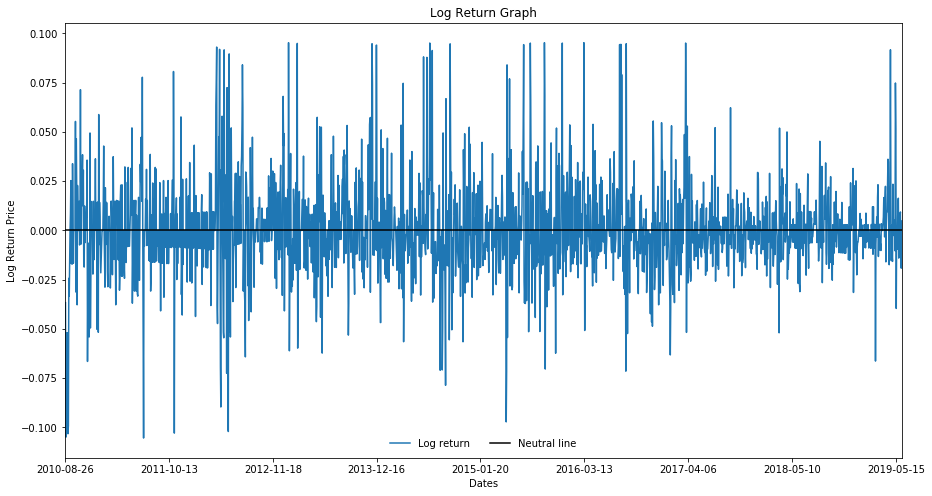

In [ ]:
b = company.loc[:, ["Closing Price", "Previous Closing Price"]]
log_return = np.log(b["Closing Price"]) - np.log(b["Previous Closing Price"])
log_return.plot(label="Log return")
plt.axhline(y = 0, color = "black", label="Neutral line")
plt.ylabel("Log Return Price")
plt.legend(frameon=False, loc='lower center', ncol=2)
plt.title('Log Return Graph')
clear_output()
plt.show()

In [ ]:
company.head()

,Traded Company,No. of Transaction,Maximum Price,Minimum Price,Closing Price,Traded Shares,Total Amount During Transaction,Previous Closing Price,Difference
Dates,,,,,,,,,
2010-08-26,Agriculture Development Bank Limited,2,255.0,250.0,250.0,40.0,10150.0,0.0,250.0
2010-08-29,Agriculture Development Bank Limited,2,245.0,241.0,241.0,20.0,4860.0,250.0,-9.0
2010-08-30,Agriculture Development Bank Limited,6,237.0,217.0,217.0,60.0,13620.0,241.0,-24.0
2010-08-31,Agriculture Development Bank Limited,6,213.0,196.0,196.0,60.0,12210.0,217.0,-21.0
2010-09-02,Agriculture Development Bank Limited,6,193.0,178.0,178.0,60.0,11130.0,196.0,-18.0


In [ ]:
# Snippets to convert dates str into int
#from datetime import datetime
#[datetime(int(j[0]), int(j[1]), int(j[2])) for j in [i.split("-") for i in company.index]]

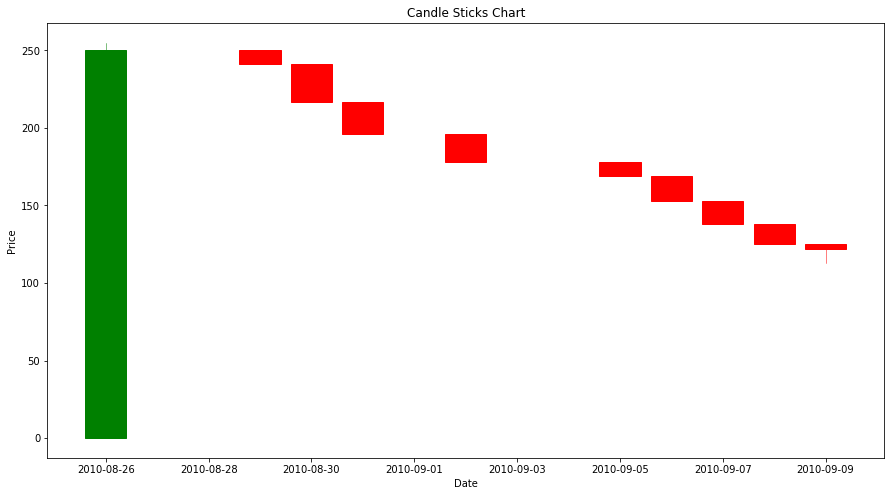

In [ ]:
# Creating Candle Sticks charts

# Converting Date into integer format and dump into company DataFrame
company["Date"] = pd.to_datetime(company.index)
company["Date"] = company["Date"].apply(mdates.date2num)

# Creating required data in new DataFrame OHLC (i.e. Open-high-low-close chart)
ohlc = company[["Date", "Previous Closing Price", "Maximum Price", "Minimum Price", "Closing Price"]].copy()

# For shorter timespan
#ohlc = ohlc.tail(10)

ohlc = ohlc.head(10)

fig, ax = plt.subplots()

# Plotting the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.8, colorup='green', colordown='red')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Candle Sticks Chart')

plt.xlabel("Date")
plt.ylabel("Price")

plt.show()

In [ ]:
# Mearging all the plot into single figure.

#####################################################################################
# Fixing the figure size
fig = plt.figure(figsize=(15,13))

#####################################################################################
# Exponential moving average on stock price.

fig.add_subplot(3,1,1)
b = company.loc[:,"Total Amount During Transaction"]
ax = b.plot.bar()
ax.tick_params(labelbottom=False)  
ax.get_xaxis().set_ticks([])
plt.xlabel("")
plt.ylabel("Total Shares During Transaction")
plt.title("Visualization of {} company".format(ask))

#####################################################################################
# Total Shares During Transaction per day of this company 

fig.add_subplot(3,1,2)
a = company.loc[:, "Closing Price"]
a.plot(label="Closing Price")
#a.ewm(span=5).mean().plot(label = "5-days EMA")
a.ewm(span=35).mean().plot(label = "35-days EMA")
plt.ylabel("Closing Price")
plt.legend(loc='upper right', frameon=False)

#####################################################################################
# Candle sticks chart

# Converting Date into integer format and dump into company DataFrame
company["Date"] = pd.to_datetime(company.index)
company["Date"] = company["Date"].apply(mdates.date2num)

# Creating required data in new DataFrame OHLC (i.e. Open-high-low-close chart)
ohlc = company[["Date", "Previous Closing Price", "Maximum Price", "Minimum Price", "Closing Price"]].copy()

ax1 = fig.add_subplot(3,1,3)

# Plotting the candlesticks
k = candlestick_ohlc(ax1, ohlc.values, width=.8, colorup='green', colordown='red')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xlabel("Dates")
plt.ylabel("Price")
plt.show()